<a href="https://colab.research.google.com/github/SandaruAbenayake/ml-projects-collection/blob/main/SPAM_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk #natureal lanage processing library

In [ ]:
df = pd.read_csv("drive/MyDrive/Dataset/spam.csv",encoding="Latin-1")

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
#df.drop(columns=['Unnamed:2', 'Unnamed:3', 'Unnamed:4'], inplace=True)

In [ ]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)

In [ ]:
df.sample(5)

,class,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
438,ham,"Hi hope u get this txt~journey hasnt been gd,n...",NaN,NaN,NaN
3022,ham,You are a very very very very bad girl. Or lady.,NaN,NaN,NaN
5107,ham,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...,NaN,NaN,NaN
4040,spam,Please call our customer service representativ...,NaN,NaN,NaN
1899,ham,I love working from home :),NaN,NaN,NaN


In [ ]:
df.groupby('class').describe()

sms                                                                 \
      count unique                                                top freq   
class                                                                        
ham    4825   4516                             Sorry, I'll call later   30   
spam    747    653  Please call our customer service representativ...    4   

      Unnamed: 2                                                            \
           count unique                                                top   
class                                                                        
ham           45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam           5      4                                        PO Box 5249   

           Unnamed: 3                                    Unnamed: 4         \
      freq      count unique                    top freq      count unique   
class                                                                        
ham      3         10      9                     GE    2          6      5   
spam     2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                     
           top freq  
class                
ham    GNT:-)"    2  
spam       NaN  NaN

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.groupby('class').describe()

sms                                                                 \
      count unique                                                top freq   
class                                                                        
ham    4516   4516                         Rofl. Its true to its name    1   
spam    653    653  This is the 2nd time we have tried 2 contact u...    1   

      Unnamed: 2                                                            \
           count unique                                                top   
class                                                                        
ham           39     39   the person is definitely special for u..... B...   
spam           4      4                                        PO Box 5249   

           Unnamed: 3                                    Unnamed: 4         \
      freq      count unique                    top freq      count unique   
class                                                                        
ham      1          9      9       why to miss them    1          5      5   
spam     1          1      1   MK17 92H. 450Ppw 16"    1          0      0   

                                            
                                  top freq  
class                                       
ham     just Keep-in-touch\" gdeve.."    1  
spam                              NaN  NaN

Data Vishual

In [ ]:
df["Length"]= df["sms"].apply(len)

In [ ]:
df.head(2)

,class,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

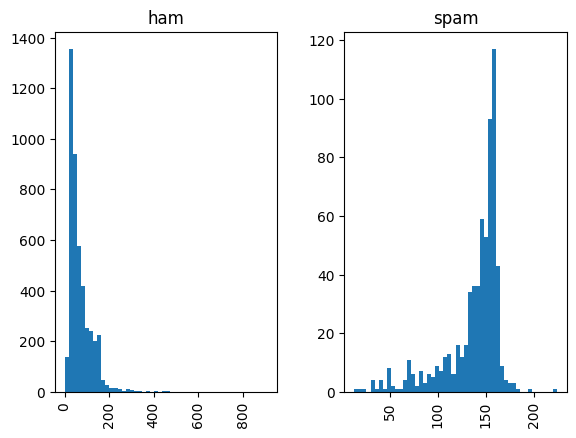

In [ ]:
df.hist(column='Length',by='class',bins=50) #histrograme

**Step 2 preprocesing**

In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head(5)

,class,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

# STEP 2: Define the clean_text function
def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # Only if your function uses stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    cleaned = []

    for word in tokens:
        if word.isalnum() and word not in stopwords.words('english'):
            cleaned.append(ps.stem(word))

    return " ".join(cleaned)


In [ ]:
df['sms_clean'] = df['sms'].apply(clean_text)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
